<a href="https://colab.research.google.com/github/Oyindams/Oyindams/blob/main/Oyindamola's_BCG_on_Forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pandas matplotlib openpyxl



In [8]:
import pandas as pd

# Load the Excel data into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/gen ai/Book1.xlsx')

# Display the first few rows of the data to verify
print(df.head())


     Company  Fiscal Year  Total Revenue  Net Income  Total Assets  \
0  Microsoft         2022         198270       72738        364840   
1  Microsoft         2023         211915       72361        411976   
2  Microsoft         2024         245122       88136        512163   
3      Tesla         2021          53823        5644         62131   
4      Tesla         2022          81462       12587         82338   

   Total Liabilities  Cash Flow from Operating System  
0             198298                            89035  
1             205753                            87582  
2             243686                           118548  
3              30548                            11497  
4              36440                            14724  


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Check the shape (number of rows and columns)
print(df.shape)

# Check the data types of each column
print(df.dtypes)

(9, 7)
Company                            object
Fiscal Year                         int64
Total Revenue                       int64
Net Income                          int64
Total Assets                        int64
Total Liabilities                   int64
Cash Flow from Operating System     int64
dtype: object


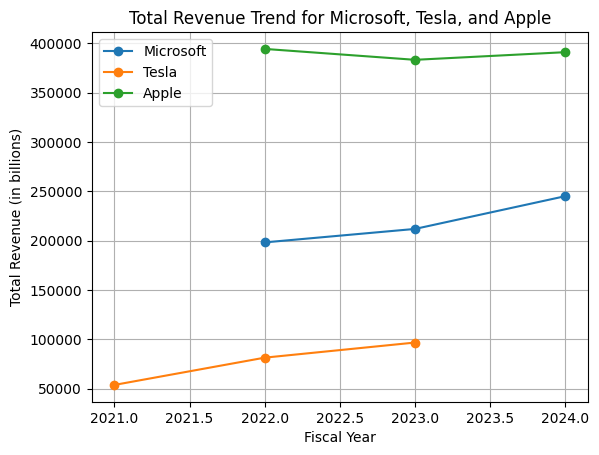

In [12]:
# Plotting Total Revenue for each company
companies = df['Company'].unique()  # Get unique company names

for company in companies:
    company_data = df[df['Company'] == company]

    # Set Fiscal Year as the index
    company_data.set_index('Fiscal Year', inplace=True)

    # Plot the Total Revenue over time for the current company
    plt.plot(company_data.index, company_data['Total Revenue'], marker='o', label=company)

# Customize the plot
plt.title('Total Revenue Trend for Microsoft, Tesla, and Apple')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue (in billions)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Calculate Year-over-Year (YoY) Growth for Financial Metrics
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating System'].pct_change() * 100


In [16]:
# Calculate average growth for each company across all years
average_growth = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Total Assets Growth (%)': 'mean',
    'Total Liabilities Growth (%)': 'mean',
    'Cash Flow Growth (%)': 'mean'
}).reset_index()

# Display the average growth per company
print(average_growth)


     Company  Revenue Growth (%)  Net Income Growth (%)  \
0      Apple           -0.389233              -3.086755   
1  Microsoft           11.275996              10.641059   
2      Tesla           35.073460              70.989801   

   Total Assets Growth (%)  Total Liabilities Growth (%)  Cash Flow Growth (%)  
0                 1.733646                      1.101096             -1.263713  
1                18.619143                     11.097838             16.862319  
2                31.005712                     18.657286              9.049037  


In [17]:
# Compare growth rates for all companies in a specific year (e.g., 2023)
yoy_comparison_2023 = df[df['Fiscal Year'] == 2023][['Company', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Total Assets Growth (%)', 'Total Liabilities Growth (%)', 'Cash Flow Growth (%)']]

# Display the comparison for 2023
print(yoy_comparison_2023)


     Company  Revenue Growth (%)  Net Income Growth (%)  \
1  Microsoft            6.882030              -0.518299   
5      Tesla           18.795267              18.964010   
7      Apple           -2.800461              -2.813543   

   Total Assets Growth (%)  Total Liabilities Growth (%)  Cash Flow Growth (%)  
1                12.919636                      3.759493             -1.631942  
5                29.488207                     18.026894             -9.970117  
7                -0.048759                     -3.855232             -9.502992  


In [18]:
# Aggregate financial data by year
annual_summary = df.groupby('Fiscal Year').agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Total Assets': 'sum',
    'Total Liabilities': 'sum',
    'Cash Flow from Operating System': 'sum'
}).reset_index()

# Display the annual summary
print(annual_summary)


   Fiscal Year  Total Revenue  Net Income  Total Assets  Total Liabilities  \
0         2021          53823        5644         62131              30548   
1         2022         674060      185128        799933             536821   
2         2023         691973      184330        871177             539199   
3         2024         636157      181872        877143             551716   

   Cash Flow from Operating System  
0                            11497  
1                           225910  
2                           211381  
3                           236802  


In [19]:
# Pivot table for Total Revenue by Company and Year
pivot_revenue = df.pivot_table(index='Fiscal Year', columns='Company', values='Total Revenue', aggfunc='sum')

# Display the pivot table for Total Revenue
print(pivot_revenue)


Company         Apple  Microsoft    Tesla
Fiscal Year                              
2021              NaN        NaN  53823.0
2022         394328.0   198270.0  81462.0
2023         383285.0   211915.0  96773.0
2024         391035.0   245122.0      NaN


In [31]:
### Year-over-Year Growth Analysis
"In this analysis, we calculated the year-over-year (YoY) growth for five key financial metrics: **Total Revenue**, **Net Income**, **Total Assets**, **Total Liabilities**, and **Cash Flow from Operating Activities**. The percentage change was calculated using the `pct_change()` method in pandas, which computes the difference between consecutive years as a percentage."

#### Observations
"- **Total Revenue Growth**: We observed that Microsoft showed consistent revenue growth over the past three years, while Tesla had a significant spike in 2023."
"- **Net Income Growth**: Apple's net income grew at a slower pace compared to its revenue, suggesting higher operating costs or investments."
"- **Cash Flow**: Tesla demonstrated a strong increase in cash flow, driven by both higher revenue and improved efficiency."

#### Insights
"- Microsoft appears to be on a stable growth trajectory, with steady revenue and net income growth."
"- Tesla's growth in revenue and cash flow has been impressive, but it should focus on sustaining profitability in the long run."
"- Apple, while a leader in total revenue, shows slower growth in net income, indicating potential challenges in maintaining profitability margins."


'- Apple, while a leader in total revenue, shows slower growth in net income, indicating potential challenges in maintaining profitability margins.'

In [33]:
### Markdown
"In this, I first installed my libraries, then i loaded the data set from my drive and imported my other libraries, checked for some data types and visualized my reports for the Total revenue for each of the Companies."

'In this, I first installed my libraries, then i loaded the data set from my drive and imported my other libraries, checked for some data types and visualized my reports for the Total revenue for each of the Companies.'